In [1]:
# Importing the libraries

import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings("ignore")

In [3]:
# Defining a function to plot the Mendenhall's Characteristic Curves of Composition 

def mendenhall_curve(df):
    str_df = " "
    for i in range(0,len(df)):
        str_df = str_df + df['Title'][i]
    df_token = []
    df_token_dist = [] 
    tokens = nltk.word_tokenize(str_df) 
    df_token = ([token for token in tokens if any(c.isalpha() for c in token)])
    token_lengths = [len(token) for token in df_token]
    df_token_dist = nltk.FreqDist(token_lengths)
    plt.figure(figsize=(10,7))
    df_token_dist.plot(20)    

In [4]:
# Defining a function to add columns corresponding to the universal tagset in the pos_tag function 

def pos_tag_insert(df):
    a = []
    for i in range(0,len(df)):
        a.append(0)
    df.insert(0,"ADJ",a)
    df.insert(0,"ADP",a)
    df.insert(0,"ADV",a)
    df.insert(0,"CONJ",a)
    df.insert(0,"DET",a)
    df.insert(0,"NOUN",a)
    df.insert(0,"NUM",a)
    df.insert(0,"PRT",a)
    df.insert(0,"PRON",a)
    df.insert(0,"VERB",a)
    df.insert(0,".",a)
    df.insert(0,"X",a)
    df.insert(0,"NoOfWords",a)
    df.insert(0,"NoOfChar",a)

In [5]:
def word_char(df):
    for i in range(0,len(df)):
        char = 0
        word = 1
        string = df['Title'][i]
        for j in string:
            char = char +1
            if (j == ' '):
                word = word + 1
        df['NoOfWords'][i] = word
        df['NoOfChar'][i] = char

In [6]:
# Defining a function to tokenize the titles in the dataset and perform pos tagging on it.

def tokenize(df):
    pos_df = []
    for i in range(0,len(df)):
        tokens = []
        tokens = nltk.word_tokenize(df['Title'][i])
        pos_df.append(nltk.pos_tag(tokens,tagset = 'universal'))
    return pos_df    

In [7]:
# Defining a function to create the dataframe of the pos_tags corresponding to each title.

def pos_tag(df,pos_df):
    for i in range(0,len(df)):
        for j in range(0,len(pos_df[i])):
            if pos_df[i][j][1] == "X" :
                df["X"][i] = df["X"][i] + 1
            if pos_df[i][j][1] == "." :
                df["."][i] = df["."][i] + 1
            if pos_df[i][j][1] == "VERB" :
                df["VERB"][i] = df["VERB"][i] + 1
            if pos_df[i][j][1] == "PRON" :
                df["PRON"][i] = df["PRON"][i] + 1
            if pos_df[i][j][1] == "PRT" :
                df["PRT"][i] = df["PRT"][i] + 1
            if pos_df[i][j][1] == "NUM" :
                df["NUM"][i] = df["NUM"][i] + 1
            if pos_df[i][j][1] == "NOUN" :
                df["NOUN"][i] = df["NOUN"][i] + 1
            if pos_df[i][j][1] == "DET" :
                df["DET"][i] = df["DET"][i] + 1
            if pos_df[i][j][1] == "CONJ" :
                df["CONJ"][i] = df["CONJ"][i] + 1
            if pos_df[i][j][1] == "ADV" :
                df["ADV"][i] = df["ADV"][i] + 1
            if pos_df[i][j][1] == "ADP" :
                df["ADP"][i] = df["ADP"][i] + 1
            if pos_df[i][j][1] == "ADJ" :
                df["ADJ"][i] = df["ADJ"][i] + 1

In [8]:
features = ['ADJ', 
'ADP', 
'ADV', 
'CONJ',    
'DET', 
'NOUN',  
'NUM', 
'PRT',
'PRON',    
'VERB',    
'.',   
'X' ]

In [9]:
def tag_plot(df):
    pos_tag_insert(df)
    pos = []
    pos = tokenize(df)
    pos_tag(df,pos)
    plt.figure(figsize=(10,7))
    sns.barplot(x = features,y = df[features].sum(axis=0))

In [10]:
# Reading the datasets

fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')
liar_train = pd.read_csv('LIAR_train.csv',encoding = 'latin-1')
liar_test = pd.read_csv('LIAR_test.csv',encoding = 'latin-1')
liar_val = pd.read_csv("LIAR_val.csv",encoding = 'latin-1')

In [11]:
fake['Title'] = fake['title']
fake.drop(['title','subject','date','text'],axis=1,inplace=True)


In [12]:
true['Title'] = true['title']
true.drop(['title','subject','date','text'],axis=1,inplace=True)

In [13]:
# defining a function to change the labels in the Liar datasets to a binary classification 

def label(df):
    for i  in range(0,len(df)):
        if df['Label'][i] == 'barely-true' :
            df['Label'][i] = int(0)
        if df['Label'][i] == 'pants-fire' :
            df['Label'][i] = int(0)
        if df['Label'][i] == 'FALSE' :
            df['Label'][i] = int(0)
        if df['Label'][i] == 'half-true' :
            df['Label'][i] = int(0)
        if df['Label'][i] == 'TRUE' :
            df['Label'][i] = int(1)
        if df['Label'][i] == 'mostly-true' :
            df['Label'][i] = int(1)

In [14]:
label(liar_test)
label(liar_val)
label(liar_train)  

In [15]:
# Changing the datatype of the Label column in the LIAR datasets to integer.
liar_test['Label'] = liar_test.Label.astype('int64')
liar_train['Label'] = liar_train.Label.astype('int64')
liar_val['Label'] = liar_val.Label.astype('int64') 

In [16]:
# Dropping all the columns except title and label.
liar_train.drop(['1','2','3','4','5','6','7','8','9','Author','type'],axis=1,inplace=True)
liar_test.drop(['1','2','3','4','5','6','7','8','9','Author','Type'],axis=1,inplace=True)
liar_val.drop(['1','2','3','4','5','6','7','8','9','author','Type'],axis=1,inplace=True)

In [17]:
liar = pd.concat([liar_train,liar_val,liar_test])
liar.reset_index(drop=True,inplace=True)

In [18]:
#Separating the fake and true news into separate datasets.
liar_fake = liar[liar['Label'] == 0] 
liar_true = liar[liar['Label'] == 1]

In [19]:
liar_fake.reset_index(inplace=True,drop=True)
liar_true.reset_index(inplace=True,drop=True)

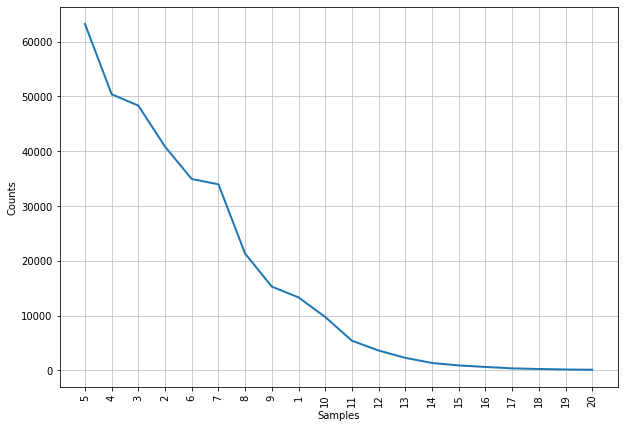

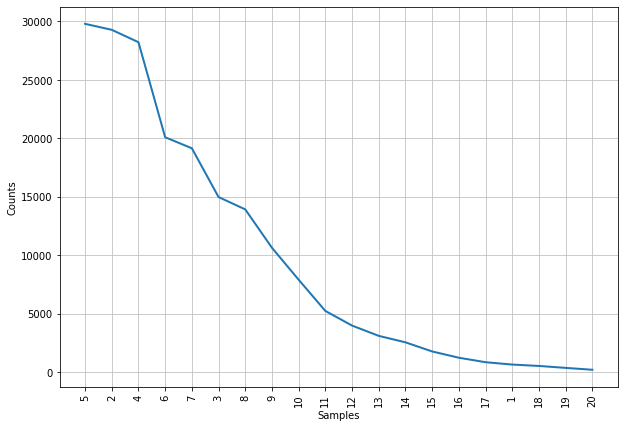

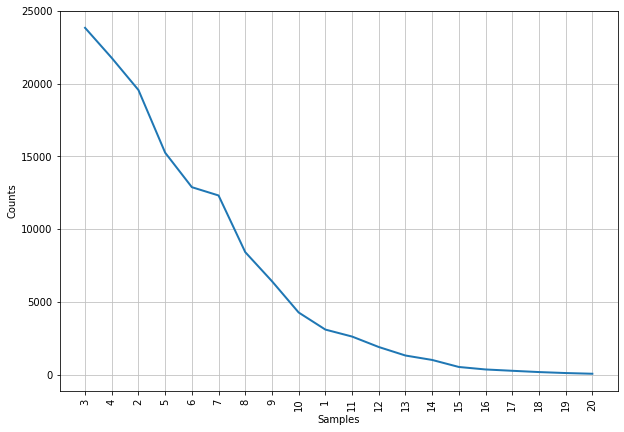

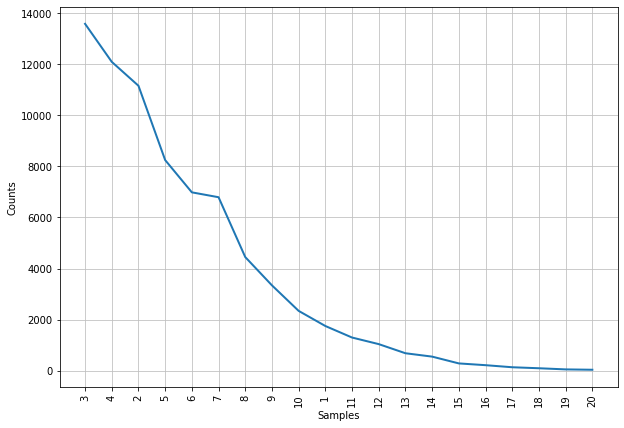

In [20]:
for df in [fake,true,liar_fake,liar_true]:
    mendenhall_curve(df)

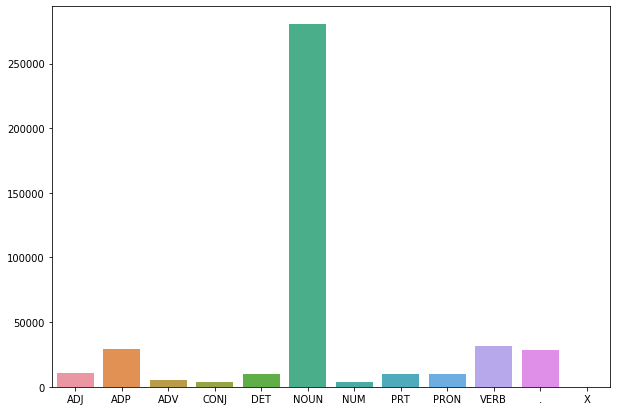

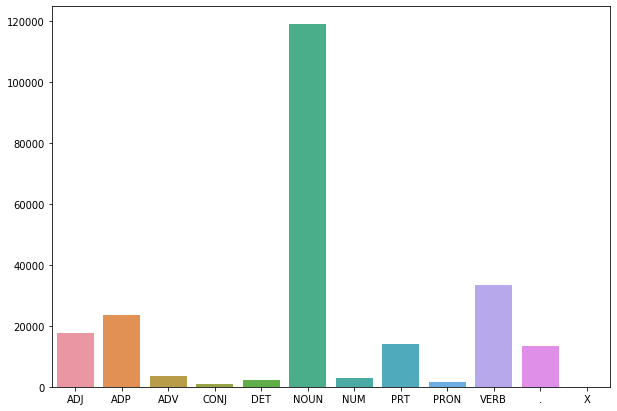

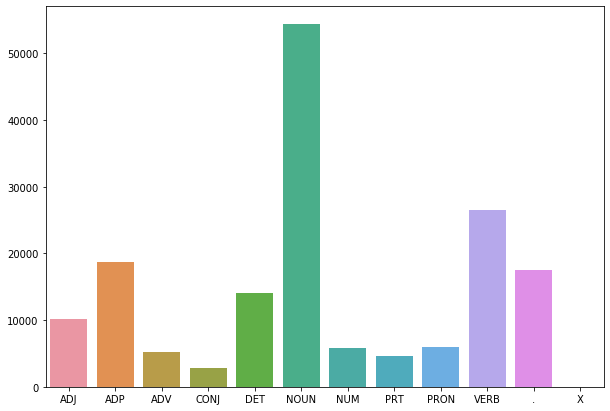

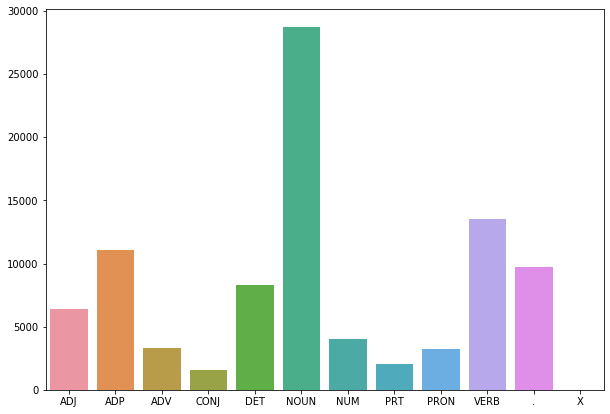

In [21]:
# Plotting the barplots for the datasets with the features in the x-axis.
for df in [fake,true,liar_fake,liar_true]:
    tag_plot(df)

In [22]:
# Adding new column to true news dataset which labels the true news as 1 
label = []
for i in range(0,len(fake)):
    label.append(0)
fake['label'] = label   

In [23]:
# Adding new column to fake news dataset which labels the fake news as 0 
label = []
for i in range(0,len(true)):
    label.append(1)
true['label'] = label

In [25]:
for df in [liar_train,liar_val,liar_test]:
    pos_tag_insert(df)

In [26]:
# Adding 2 new columns- Number of words and number of characters
for df in [fake,true,liar_train,liar_val,liar_test]:
    word_char(df)

In [27]:
for df in [liar_train,liar_val,liar_test]:
    pos=[]
    pos = tokenize(df)
    pos_tag(df,pos)

In [28]:
news = pd.concat([fake,true])
news.reset_index(drop=True,inplace=True) 

In [29]:
liar = pd.concat([liar_train,liar_val,liar_test])
liar.reset_index(drop=True,inplace=True)

In [30]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

Cleaning the text data and processing it - Removing all punctuation and numbers, making all words lowercase and stemming

In [31]:
ps = PorterStemmer()
corpus_isot=[]
for i in range(0,len(news)):
    review_data = re.sub('[^a-zA-Z]',' ',news['Title'][i])    
    review_data = review_data.lower()
    review_data = review_data.split()
    
    review_data = [ps.stem(word) for word in review_data if not word in stopwords.words('english')]
    review_data = " ".join(review_data)
    corpus_isot.append(review_data)

In [32]:
ps = PorterStemmer()
corpus_liar=[]
for i in range(0,len(liar)):
    review_data = re.sub('[^a-zA-Z]',' ',liar['Title'][i])    
    review_data = review_data.lower()
    review_data = review_data.split()
    
    review_data = [ps.stem(word) for word in review_data if not word in stopwords.words('english')]
    review_data = " ".join(review_data)
    corpus_liar.append(review_data)

In [33]:
liar['Title'] = corpus_liar 

In [34]:
news['Title'] = corpus_isot

Combining all the columns into one column News

In [35]:
news['News'] = str(news['X'] + news['.'] + news['VERB'] + news['PRON'] + news['PRT'] + news['NUM'] + news['NOUN'] + news['DET'] + news['CONJ'] + news['ADV'] + news['ADP'] + news['ADJ'] + news['NoOfWords'] + news['NoOfChar']) + news['Title']

In [36]:
liar['News'] = str(liar['X'] + liar['.'] + liar['VERB'] + liar['PRON'] + liar['PRT'] + liar['NUM'] + liar['NOUN'] + liar['DET'] + liar['CONJ'] + liar['ADV'] + liar['ADP'] + liar['ADJ'] + liar['NoOfWords'] + liar['NoOfChar']) + liar['Title']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Training on ISOT data and testing on Liar data 

In [38]:
# Performing tf-idf vectorization on the News column
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word') 
X_i = vectorizer.fit_transform(news['News'])
X_l = vectorizer.transform(liar['News'])
X_train_i,X_test_i,y_train_i,y_test_i = train_test_split(X_i,news['label'])


In [39]:
y_liar = liar['Label']

In [40]:
model_nb_isot = MultinomialNB()
model_nb_isot.fit(X_train_i,y_train_i) 

MultinomialNB()

In [41]:
print(accuracy_score(y_test_i,model_nb_isot.predict(X_test_i)),accuracy_score(y_liar,model_nb_isot.predict(X_l))) 

0.9355011135857461 0.5733873480835151


In [42]:
model_log_isot = LogisticRegression()
model_log_isot.fit(X_train_i,y_train_i)

LogisticRegression()

In [43]:
print(accuracy_score(y_test_i,model_log_isot.predict(X_test_i)),accuracy_score(y_liar,model_log_isot.predict(X_l))) 

0.9435189309576837 0.6456840137114366


In [44]:
from sklearn.neighbors import KNeighborsClassifier
model_kn_isot = KNeighborsClassifier(n_neighbors=5)
model_kn_isot.fit(X_train_i,y_train_i)

KNeighborsClassifier()

In [45]:
print(accuracy_score(y_test_i,model_kn_isot.predict(X_test_i)),accuracy_score(y_liar,model_kn_isot.predict(X_l))) 

0.8876614699331848 0.5204113430975382


In [46]:
from xgboost import XGBClassifier
model_xgb_isot = XGBClassifier()
model_xgb_isot.fit(X_train_i,y_train_i)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
print(accuracy_score(y_test_i,model_xgb_isot.predict(X_test_i)),accuracy_score(y_liar,model_xgb_isot.predict(X_l))) 

0.9071714922048998 0.6463851667186039


In [48]:
from sklearn.ensemble import RandomForestClassifier
model_rf_isot = RandomForestClassifier()
model_rf_isot.fit(X_train_i,y_train_i)

RandomForestClassifier()

In [49]:
print(accuracy_score(y_test_i,model_rf_isot.predict(X_test_i)),accuracy_score(y_liar,model_rf_isot.predict(X_l))) 

0.9140311804008908 0.6468526020567155


In [50]:
from sklearn.tree import DecisionTreeClassifier
model_dt_isot = DecisionTreeClassifier()
model_dt_isot.fit(X_train_i,y_train_i)

DecisionTreeClassifier()

In [51]:
print(accuracy_score(y_test_i,model_dt_isot.predict(X_test_i)),accuracy_score(y_liar,model_dt_isot.predict(X_l))) 

0.892293986636971 0.633219071361795


In [52]:
from sklearn.svm import SVC
model_svm_isot = SVC()
model_svm_isot.fit(X_train_i,y_train_i)

SVC()

In [53]:
print(accuracy_score(y_test_i,model_svm_isot.predict(X_test_i)),accuracy_score(y_liar,model_svm_isot.predict(X_l))) 

0.9546547884187082 0.6454502960423808


Training on LIAR data and testing on ISOT data

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word') 
X_l = vectorizer.fit_transform(liar['News'])
X_i = vectorizer.transform(news['News'])
X_train_l,X_test_l,y_train_l,y_test_l = train_test_split(X_l,liar['Label'])


In [55]:
y_isot = news['label']

In [56]:
model_nb_liar = MultinomialNB()
model_nb_liar.fit(X_train_l,y_train_l) 

MultinomialNB()

In [57]:
print(accuracy_score(y_test_l,model_nb_liar.predict(X_test_l)),accuracy_score(y_isot,model_nb_liar.predict(X_i))) 

0.6478653786226238 0.5295336095149005


In [58]:
model_log_liar = LogisticRegression()
model_log_liar.fit(X_train_l,y_train_l)

LogisticRegression()

In [59]:
print(accuracy_score(y_test_l,model_log_liar.predict(X_test_l)),accuracy_score(y_isot,model_log_liar.predict(X_i))) 

0.6593954502960424 0.5281749743863869


In [60]:
model_kn_liar = KNeighborsClassifier(n_neighbors=5)
model_kn_liar.fit(X_train_l,y_train_l)

KNeighborsClassifier()

In [61]:
print(accuracy_score(y_test_l,model_kn_liar.predict(X_test_l)),accuracy_score(y_isot,model_kn_liar.predict(X_i))) 

0.6191960112184481 0.5283308833355606


In [62]:
model_xgb_liar = XGBClassifier()
model_xgb_liar.fit(X_train_l,y_train_l)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
print(accuracy_score(y_test_l,model_log_liar.predict(X_test_l)),accuracy_score(y_isot,model_log_liar.predict(X_i))) 

0.6593954502960424 0.5281749743863869


In [64]:
model_rf_liar = RandomForestClassifier()
model_rf_liar.fit(X_train_l,y_train_l)

RandomForestClassifier()

In [65]:
print(accuracy_score(y_test_l,model_rf_liar.predict(X_test_l)),accuracy_score(y_isot,model_rf_liar.predict(X_i))) 

0.6556559675911499 0.5690676644839414


In [66]:
model_dt_liar = DecisionTreeClassifier()
model_dt_liar.fit(X_train_l,y_train_l)

DecisionTreeClassifier()

In [67]:
print(accuracy_score(y_test_l,model_dt_liar.predict(X_test_l)),accuracy_score(y_isot,model_dt_liar.predict(X_i))) 

0.5758803365534434 0.5353467860483763


In [68]:
model_svm_liar = SVC()
model_svm_liar.fit(X_train_l,y_train_l)

SVC()

In [69]:
print(accuracy_score(y_test_l,model_svm_liar.predict(X_test_l)),accuracy_score(y_isot,model_svm_liar.predict(X_i))) 

0.6575257089435962 0.5246558866764667
